# MET Data Set Analysis

1. Goal/Question we answer with the group of data:
2. The three coolest data cleaning/wrangling steps:
3. The graph with the coolest insight about the data or prettiest view of it 
4. Any roadblocks we’re facing:


Also: should we follow the following EDA steps:
> 1. Description
> 2. Making Data Dictionary
> 3. QA (Quality Assurance)
> 4. Variable Distributions
> 5. Comparisons


In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib.style as style

%matplotlib inline

In [36]:
met = pd.read_csv('MET.csv')

In [37]:
met.head()

,Object Number,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,...,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL
0,1979.486.1,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
1,1980.264.5,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
2,67.265.9,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
3,67.265.10,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN
4,67.265.11,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,...,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN


In [38]:
met.columns

Index(['Object Number', 'Is Highlight', 'Is Public Domain', 'Is Timeline Work',
       'Object ID', 'Department', 'AccessionYear', 'Object Name', 'Title',
       'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role',
       'Artist Prefix', 'Artist Display Name', 'Artist Display Bio',
       'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality',
       'Artist Begin Date', 'Artist End Date', 'Artist Gender',
       'Artist ULAN URL', 'Artist Wikidata URL', 'Object Date',
       'Object Begin Date', 'Object End Date', 'Medium', 'Dimensions',
       'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country',
       'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River',
       'Classification', 'Rights and Reproduction', 'Link Resource',
       'Object Wikidata URL', 'Metadata Date', 'Repository', 'Tags',
       'Tags AAT URL'],
      dtype='object')

In [39]:
met.shape

(474383, 51)

In [40]:
met.dtypes

Object Number               object
Is Highlight                  bool
Is Public Domain              bool
Is Timeline Work              bool
Object ID                    int64
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date                 object
Object Begin Date            int64
Object End Date     

In [41]:
print(met.isnull().sum())

Object Number                   0
Is Highlight                    0
Is Public Domain                0
Is Timeline Work                0
Object ID                       0
Department                      0
AccessionYear                4156
Object Name                  1936
Title                       29894
Culture                    268151
Period                     385000
Dynasty                    451247
Reign                      463207
Portfolio                  451135
Artist Role                204041
Artist Prefix              385163
Artist Display Name        201947
Artist Display Bio         241101
Artist Suffix              462431
Artist Alpha Sort          201981
Artist Nationality         291952
Artist Begin Date          238471
Artist End Date            238473
Artist Gender              373500
Artist ULAN URL            283449
Artist Wikidata URL        336874
Object Date                 14998
Object Begin Date               0
Object End Date                 0
Medium        

## Removing Columns
Removed unecessary columns and columns with a large amount of null entries

In [42]:
remove = ['Object Number', 'Artist Prefix', 'Portfolio', 'Artist Suffix', 
          'Artist ULAN URL', 'Artist Wikidata URL', 'Artist Alpha Sort', 
          'Geography Type', 'Excavation', 'River', 
          'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL', 
          'Metadata Date', 'Tags AAT URL']
met = met.drop(remove, axis=1)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Period,...,State,County,Country,Region,Subregion,Locale,Locus,Classification,Repository,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,"Metropolitan Museum of Art, New York, NY",NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,"Metropolitan Museum of Art, New York, NY",NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,"Metropolitan Museum of Art, New York, NY",NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,"Metropolitan Museum of Art, New York, NY",NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,"Metropolitan Museum of Art, New York, NY",NaN


In [43]:
met["Classification"].unique().shape

(1188,)

In [44]:
met["Department"].unique()

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'European Paintings', 'Robert Lehman Collection', 'The Cloisters',
       'Musical Instruments', 'Egyptian Art', 'The Libraries'],
      dtype=object)

In [45]:
print(met.isnull().sum())

Is Highlight                0
Is Public Domain            0
Is Timeline Work            0
Object ID                   0
Department                  0
AccessionYear            4156
Object Name              1936
Title                   29894
Culture                268151
Period                 385000
Dynasty                451247
Reign                  463207
Artist Role            204041
Artist Display Name    201947
Artist Display Bio     241101
Artist Nationality     291952
Artist Begin Date      238471
Artist End Date        238473
Artist Gender          373500
Object Date             14998
Object Begin Date           0
Object End Date             0
Medium                   7153
Dimensions              75485
Credit Line               417
City                   442624
State                  471855
County                 466143
Country                399296
Region                 443048
Subregion              452327
Locale                 458773
Locus                  466986
Classifica

In [46]:
met.shape

(474383, 36)

In [47]:
blank = ['Period', 'Dynasty', 'Reign', 'Artist Display Bio', 'Artist Nationality', 'City', 'State', 'County', 'Country', 
         'Region', 'Subregion', 'Locale', 'Locus']
met = met.drop(blank, axis=1)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,Maker,...,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,"Metropolitan Museum of Art, New York, NY",NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,...,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,"Metropolitan Museum of Art, New York, NY",NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN


# <font color='#eb3483'> I didn't run any of this section!!! <font>
## Exploring gender and other factors

In [15]:
gender_met = met.dropna(subset=["Artist Gender"])
gender_met.shape

(100883, 23)

In [16]:
gender_met = gender_met[(gender_met["Artist Gender"]=="Male") 
           | (gender_met["Artist Gender"]=="Female")]

In [17]:
gender_met.shape

(8459, 23)

In [18]:
#there's only female artists present
gender_met["Artist Gender"].unique()

array(['Female'], dtype=object)

In [19]:
gender_met[gender_met["Is Timeline Work"]==True].shape

(707, 23)

In [20]:
met_clean_credit = met.dropna(subset=["Credit Line"])
met_clean_credit.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
0,False,False,False,1,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,Maker,...,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,"Metropolitan Museum of Art, New York, NY",NaN
1,False,False,False,2,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,...,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,"Metropolitan Museum of Art, New York, NY",NaN
2,False,False,False,3,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
3,False,False,False,4,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN
4,False,False,False,5,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,...,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",Metal,"Metropolitan Museum of Art, New York, NY",NaN


In [21]:
met[met["Credit Line"].str.contains("Gift")].head()

ValueError: cannot index with vector containing NA / NaN values

In [22]:
met_cleanna = met.dropna()
met_cleanna.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
34,False,True,False,35,The American Wing,1904,Vase,The Adams Vase,American,Designer|Manufacturer,...,|,1893–95,1893,1895,"Gold, amethysts, spessartites, tourmalines, fr...",Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x...,"Gift of Edward D. Adams, 1904",Metal,"Metropolitan Museum of Art, New York, NY",Animals|Garlands|Birds|Men
241,True,True,False,282,The American Wing,1925,Window,Autumn Landscape,American,Maker|Designer,...,|Female,1923–24,1923,1924,Leaded Favrile glass,132 x 102 in. (335.3 x 259.1 cm),"Gift of Robert W. de Forest, 1925",Glass,"Metropolitan Museum of Art, New York, NY",Windows|Waterfalls|Landscapes|Autumn
295,False,False,True,341,The American Wing,1939,Basin,Basin,American,Maker|Maker,...,|,1770–1870,1770,1870,Pewter,2 x 5 3/4 x 5 3/4 in. (5.1 x 14.6 x 14.6 cm),"Gift of Mrs. J. Insley Blair, 1939",Metal,"Metropolitan Museum of Art, New York, NY",Basins
305,False,False,True,351,The American Wing,1940,Basin,Basin,American,Maker|Maker,...,|,1712–54,1712,1754,Pewter,2 3/4 x 12 7/8 x 12 7/8 in. (7 x 32.7 x 32.7 cm),"Gift of Mrs. J. Insley Blair, in memory of her...",Metal,"Metropolitan Museum of Art, New York, NY",Basins
347,False,False,True,399,The American Wing,2014,Beaker,Beaker,American,Maker|Maker,...,|,ca. 1670,1667,1670,Silver,Overall: 5 3/8 in. (13.7 cm); 7 oz. 6 dwt. (22...,"Purchase, Bequest of Emma A. Sheafer, by excha...",Silver,"Metropolitan Museum of Art, New York, NY",Coat of Arms


In [23]:
#categorical_data_dummy = pd.get_dummies(met, drop_first=True)

## art culture and accession year and credit line

In [24]:
met_spec = met[["AccessionYear", "Culture", "Credit Line"]]
met_spec.head()

,AccessionYear,Culture,Credit Line
0,1979,NaN,"Gift of Heinz L. Stoppelmann, 1979"
1,1980,NaN,"Gift of Heinz L. Stoppelmann, 1980"
2,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"
3,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"
4,1967,NaN,"Gift of C. Ruxton Love Jr., 1967"


In [25]:
met_cleanna = met_spec.dropna()
met_cleanna.head()

,AccessionYear,Culture,Credit Line
14,1916,Mexican,"Gift of Mrs. Russell Sage, 1916"
15,1916,Mexican,"Gift of Mrs. Russell Sage, 1916"
16,1916,Mexican,"Gift of Mrs. Russell Sage, 1916"
17,1916,Mexican,"Gift of Mrs. Russell Sage, 1916"
18,1916,Mexican,"Gift of Mrs. Russell Sage, 1916"


In [26]:
met_cleanna.shape

(204870, 3)

In [27]:
met_cleanna["Credit Line"].unique

<bound method Series.unique of 14                          Gift of Mrs. Russell Sage, 1916
15                          Gift of Mrs. Russell Sage, 1916
16                          Gift of Mrs. Russell Sage, 1916
17                          Gift of Mrs. Russell Sage, 1916
18                          Gift of Mrs. Russell Sage, 1916
19                          Gift of Mrs. Russell Sage, 1916
20                          Gift of Mrs. Russell Sage, 1916
21                          Gift of Mrs. Russell Sage, 1916
22                          Gift of Mrs. Russell Sage, 1916
23                          Gift of Mrs. Russell Sage, 1916
24                          Gift of Mrs. Russell Sage, 1916
25                          Gift of Mrs. Russell Sage, 1916
26                          Gift of Mrs. Russell Sage, 1916
27                          Gift of Mrs. Russell Sage, 1916
28                          Gift of Mrs. Russell Sage, 1916
29                          Gift of Mrs. Russell Sage, 1916
30       

In [28]:
gift = met_cleanna[met_cleanna["Credit Line"].str.contains("Gift")]

In [29]:
purchase = met_cleanna[met_cleanna["Credit Line"].str.contains("Purchase")]

In [30]:
bequest = met_cleanna[met_cleanna["Credit Line"].str.contains("Bequest")]

In [31]:
met_cleanna[met_cleanna["Credit Line"].str.contains("Fund")].shape #sometimes fund has overlap with "gift", in this case put fund out of consideration

(33178, 3)

In [32]:
met_cleanna["Culture"].unique()

array(['Mexican', 'Guatemalan', 'American', ..., 'French, Mansle',
       'French, possibly St. Honoré-les-Bains',
       'European or Native American'], dtype=object)

In [33]:
met_cleanna = met_cleanna.astype({"AccessionYear": int})

In [ ]:
dummies = pd.get_dummies(gift[["Culture", "Credit Line"]], drop_first=True)

In [ ]:
dummies.head()

In [ ]:
# assign different categories a number --> try to do that 

## Removed Duplicate Entries

In [ ]:
#if met[met.duplicated()].shape[0] != 0: 
#    met=met.drop_duplicates(keep='first')

In [48]:
duplicate_rows_art = met[met.duplicated()]
print(met.duplicated())
print(duplicate_rows_art.shape)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
474353    False
474354    False
474355    False
474356    False
474357    False
474358    False
474359    False
474360    False
474361    False
474362    False
474363    False
474364    False
474365    False
474366    False
474367    False
474368    False
474369    False
474370    False
474371    False
474372    False
474373    False
474374    False
474375    False
474376    False
474377    False
474378    False
474379    False
474380    False
474381    False
474382    False
Length: 474383, dtype: b

#### *Comment: None of the Rows are duplicate of the others*

## Sorting Meaningful Rows

1. Sort the dataframe by Object Begin date and filter out objects without dates or have dates that doesn't make sense
>According to observation, among the artworks in dataframe, it is very likely that among Object Date, Object Begin Date, Object End Date, Artist Begin Date, and Artist End Date, there's at least one grid that has relavant data that give insight on the year the object/artwork was created/completed. Thus when filtering the rows, I did not get rid of the rows with NaNs in parts of these date grids. 

In [49]:
met = met[met["Object Begin Date"].notnull() 
          & ((met["Object Begin Date"] != 0) 
             | (met["Object End Date"] != 0)) 
          & ((met["Object Begin Date"] <= 2020) 
             | (met["Object End Date"] <= 2020))].sort_values(by="Object Begin Date", ascending=True)
met.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
363928,False,False,True,573104,Egyptian Art,1906,"Tool, biface, hand ax, sub-cordiform","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 9.6 × W. 6.5 × Th. 1.9 cm, Wt. 122.7g (3 13...","Gift of C. T. Currelly, 1906",NaN,"Metropolitan Museum of Art, New York, NY",Tools and Equipment
363920,False,False,True,573096,Egyptian Art,1906,"Tool, Biface, Hand-axe, Ovate","Biface, commonly referred to as a hand ax",NaN,NaN,...,NaN,"ca. 400,000–240,000 B.C.",-400000,-240000,Flint,"L. 11.9 × W. 8.2 × Th. 4 cm, Wt. 356.5g (4 11/...","Gift of C. T. Currelly, 1906",NaN,"Metropolitan Museum of Art, New York, NY",Tools and Equipment
470109,False,False,True,832566,Arms and Armor,1999,Biface,Biface,Acheulean,NaN,...,NaN,"ca. 400,000–150,000 B.C.",-300050,-125000,Flint,L. 9 3/4 in. (24.8 cm); W. 4 3/4 in. (12.1 cm)...,"Purchase, Friends of Arms and Armor Gifts, 2019",Tools,"Metropolitan Museum of Art, New York, NY",NaN
363916,False,False,True,573092,Egyptian Art,1906,"Tool, point, Levallois",Retouched Levallois Point,NaN,NaN,...,NaN,"ca. 240,000–40,000 B.C.",-240000,-40000,Flint,"L. 10.9 × W. 3.8 × Th. 0.9 cm, Wt. 32.5g (4 1/...","Gift of C. T. Currelly, 1906",|,"Metropolitan Museum of Art, New York, NY",NaN
363918,False,False,True,573094,Egyptian Art,1906,"Tool, Levallois, Point",Atypical Levallois Point,NaN,NaN,...,NaN,"ca. 240,000–40,000",-240000,-40000,Flint,"L. 12.1 × W. 5.6 × Th. 1.1 cm, Wt. 72.5g (4 3/...","Gift of C. T. Currelly, 1906",|,"Metropolitan Museum of Art, New York, NY",NaN


In [50]:
met.shape

(473263, 23)

In [51]:
highlights = met[met['Is Highlight']==True]
highlights.isnull().mean()

Is Highlight           0.000000
Is Public Domain       0.000000
Is Timeline Work       0.000000
Object ID              0.000000
Department             0.000000
AccessionYear          0.128678
Object Name            0.140648
Title                  0.011970
Culture                0.494763
Artist Role            0.385037
Artist Display Name    0.374065
Artist Begin Date      0.421945
Artist End Date        0.422444
Artist Gender          0.821446
Object Date            0.001496
Object Begin Date      0.000000
Object End Date        0.000000
Medium                 0.113716
Dimensions             0.051372
Credit Line            0.054364
Classification         0.211471
Repository             0.000000
Tags                   0.266833
dtype: float64

In [52]:
highlights = highlights.dropna(subset=['Culture'])
commas = [c.split(',')[0] if ',' in c else c for c in highlights.Culture]

In [53]:
highlights['Culture'] = commas
highlights.head()

,Is Highlight,Is Public Domain,Is Timeline Work,Object ID,Department,AccessionYear,Object Name,Title,Culture,Artist Role,...,Artist Gender,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Repository,Tags
201257,True,True,True,327066,Ancient Near Eastern Art,1985,Sculpture,Seated female,Halaf,NaN,...,NaN,ca. 5600–5000 B.C.,-5600,-5000,"Ceramic, paint","H. 5.1 cm, W. 4.5 cm","Purchase, Leon Levy and Shelby White Gift, 1985",Ceramics-Sculpture,"Metropolitan Museum of Art, New York, NY",Female Nudes
154322,True,True,True,255417,Greek and Roman Art,1972,"Statuette of a woman, steatopygous",Marble female figure,Cycladic,NaN,...,NaN,4500–4000 B.C.,-4999,-4000,Marble,H. 8 7/16 in. (21.4 cm),"Bequest of Walter C. Baker, 1971",Stone Sculpture,"Metropolitan Museum of Art, New York, NY",Women
202151,True,True,True,329081,Ancient Near Eastern Art,1988,Cuneiform tablet,Proto-Cuneiform tablet with seal impressions: ...,Sumerian,NaN,...,NaN,ca. 3100–2900 B.C.,-3100,-2900,Clay,2 1/8 × 2 3/8 × 1 5/8 in. (5.4 × 6 × 4.1 cm),"Purchase, Raymond and Beverly Sackler Gift, 1988",Clay-Tablets-Inscribed-Seal Impressions,"Metropolitan Museum of Art, New York, NY",Men|Cuneiform|Boars|Dogs|Documents
202144,True,True,True,329074,Ancient Near Eastern Art,1966,Sculpture,Kneeling bull holding a spouted vessel,Proto-Elamite,NaN,...,NaN,ca. 3100–2900 B.C.,-3100,-2900,Silver,6 7/16 x 2 1/2 x 4 1/4in. (16.3 x 6.3 x 10.8cm),"Purchase, Joseph Pulitzer Bequest, 1966",Metalwork-Sculpture,"Metropolitan Museum of Art, New York, NY",Bulls
190839,True,True,True,314204,"Arts of Africa, Oceania, and the Americas",1980,Female figure,Female Figure,Valdivia,NaN,...,NaN,late 3rd millennium B.C.,-3000,-2000,Ceramic,H. 3 5/8 × W. 1 × D. 1 in. (9.2 × 2.5 × 2.5 cm),"Gift of Timothy, Peter, and Jonathan Zorach, 1980",Ceramics-Sculpture,"Metropolitan Museum of Art, New York, NY",Female Nudes


In [54]:
na = ['Native American' if ('Native' in c) else c for c in highlights.Culture]
highlights['Culture'] = na

In [55]:
paren = [c.split('(')[0] if ('(' in c) else c for c in highlights.Culture]
highlights['Culture'] = paren

In [56]:
ors = [c.split(' or ')[0] if ' or ' in c else c for c in highlights.Culture]
highlights['Culture'] = ors

In [57]:
df = highlights.groupby(by='Culture', as_index=False)[['Object ID']].count().sort_values(by='Object ID', ascending=False)

In [58]:
df

,Culture,Object ID
7,American,197
71,French,145
75,Greek,63
74,German,55
94,Italian,53
177,Roman,37
29,British,34
43,China,22
98,Japanese,18
198,Spanish,14


In [59]:
highlights['Culture'].unique()

array(['Halaf', 'Cycladic', 'Sumerian', 'Proto-Elamite', 'Valdivia',
       'Indus', 'Hattian', 'Northwest Anatolian',
       'Bactria-Margiana Archaeological Complex', 'Akkadian', 'Hurrian',
       'Neo-Sumerian', 'Old Assyrian Trading Colony', 'Babylonian',
       'Elamite', 'Minoan', 'Hittite', 'Canaanite', 'Assyrian', 'Olmec',
       'Helladic', 'China', 'Iran', 'Morobe province', 'Tembladera',
       'Israelite', 'Urartian', 'Greek', 'Cypriot', 'Achaemenid',
       'Etruscan', 'Celtic', 'East Greek', 'Scythian', 'Paracas',
       'Parthian', 'Indonesia ', 'Tolita-Tumaco', 'Nabataean',
       'Ixtlán del Río', 'Roman', 'India', 'Initial Style', 'Quimbaya',
       'Moche', 'Nasca', 'Kushan', 'Teotihuacan', 'Maya', 'Wari',
       'Central Region', 'Pakistan ', 'Byzantine', 'East Germanic',
       'Frankish', 'Sasanian', 'Japanese', 'Late Roman', 'India ',
       'Tiwanaku', 'Anglo-Saxon', 'Mayan', 'Alanic', 'Korea',
       'Southern Cambodia', 'Moche-Wari', 'Remojadas', 'Sri Lanka ',

In [60]:
# making categories:
near_east = ['Halaf', 'Sumerian', 'Proto-Elamite', 'Hattian', 'Northwest Anatolian', 'Akkadian',
              'Hurrian', 'Neo-Sumerian', 'Old Assyrian Trading Colony', 'Babylonian', 'Elamite', 'Hittite', 
              'Canaanite', 'Assyrian', 'Iran', 'Israelite', 'Urartian', 'Cypriot', 'Achaemenid', 'Parthian', 'Nabataean',
            'Pakistan', 'Sasanian', 'Turkish', 'Iranian ', 'Afghan']

western = ['Cycladic', 'Minoan', 'Helladic', 'Greek', 'Etruscan', 'Celtic', 'East Greek', 'Roman',
          'Byzantine', 'East Germanic', 'Frankish', 'Late Roman', 'Anglo-Saxon', 'Alanic', 'North Italian',
          'Carolingian', 'European', 'Ottonian', 'Central Italian', 'South Italian', 'French', 'Spanish',
          'Catalan', 'British', 'South Netherlandish', 'German', 'Italian', 'North French ', 'Western European',
          'Austrian', 'Bohemian', 'Upper Rhenish', 'Netherlandish', 'French ', 'South German', 'Venetian',
          'Flemish', 'Italian ', 'Façon de Venise', 'probably Austrian', 'American', 'Polish', 'Swiss',
          'Dutch', 'probably French', 'Russian', 'Colonial American', 'Hanoverian ', 'Norwegian', 'Belgian', 
           'Southern New Ireland', "Yup'ik"]

american = ['Valdivia', 'Olmec', 'Tembladera', 'Paracas', 'Tolita-Tumaco', 'Ixtlán del Río', 'Quimbaya', 
                 'Moche', 'Nasca', 'Teotihuacan', 'Maya', 'Wari', 'Tiwanaku', 'Mayan', 'Moche-Wari',
                 'Remojadas', 'Lambayeque', 'Nasca-Wari', 'Taíno', 'Chiriquí', 'Eastern Nahua', 'Chuquibamba', 
                 'Aztec', 'Sapi-Portuguese', 'Mexican', 'Colombian; Popayán', 'Native American', 'Osage', 'Javanese ',
           'Minneconjou Lakota/ Teton Sioux', 'San Ildefonso']

asian = ['Indus', 'Bactria-Margiana Archaeological Complex', 'China', 'Scythian', 'Indonesia', 'India', 'Kushan',
        'Japanese', 'India ', 'Korea', 'Southern Cambodia', 'Sri Lanka', 'Cambodia ', 'Eastern Central Asia', 'Japan', 
        'Nepal', 'Central Asia', 'Tibetan', 'Eastern Tibet', 'Chinese', 'Indian', 'Lampung', 'probably Chinese',
        'Yami people', 'Nage', 'Sentani people', 'Toba Batak people', 'Thai', 'Burmese', 'Philippine ', 'Western India',
        'Korean']

pacific = ['Morobe province', "Hawai'i", "Maohi ", 'Mangarevan people', "Ha'apai Islands", 'Maori people', 
           'Sawos people', 'Belauan', 'New Georgia Island ', 'Solomon Islands', 'Yessan-Mayo people', 'Bougainville',
          'Torres Strait Islander', 'Kerewa people', 'Abelam people', 'Ngadju', 'Rapa Nui people', 'Caroline Islands',
          'Cenderawasih Bay', 'Sulka people', 'Elema people', 'Southwest Malakula', 'Asmat people', 
          'Siane']
           
africa = ['Middle Niger civilization', 'Dogon peoples', 'Amhara peoples', 'Bamana peoples', 'Tigrinya peoples',
         'Edo peoples', 'Sakalava peoples', 'Yoruba peoples', 'Akan peoples', 'Punu peoples', 'Bamum kingdom', 
         'Chokwe peoples', 'Kongo peoples', 'Baule peoples', 'Mossi peoples', 'Ejagham peoples', 'Fang peoples', 
          'Luba', 'Songye peoples', 'Kwele peoples', 'Senufo peoples', 'Kambot people', 'Benin', 'Mandinka people',
         'Ganda people', 'Mangbetu', 'Possibly Barwe People', 'Dan peoples', 'Akan Ashanti people', 'Ekonda people ']
lst = [near_east, western, american, asian, pacific, africa]


In [61]:
near_east_sum = df[df['Culture'].isin(near_east)]["Object ID"].sum()
for culture in lst:
    print(df[df['Culture'].isin(culture)]["Object ID"].sum())

66
687
49
100
25
41


In [62]:
highlights_by_culture = pd.DataFrame([
    ["Near Eastern", 66], ["Western", 687], ["American", 49], ["Asian", 100], ["Pacific", 25], ["Africa", 41]], 
    columns = ["Culture_circle", "Highlight_Numbers"])
highlights_by_culture

,Culture_circle,Highlight_Numbers
0,Near Eastern,66
1,Western,687
2,American,49
3,Asian,100
4,Pacific,25
5,Africa,41


In [63]:
nonhighlights = met[met['Is Highlight']==False]
nonhighlights = nonhighlights.dropna(subset=['Culture'])
commas = [c.split(',')[0] if ',' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = commas
na = ['Native American' if ('Native' in c) else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = na

In [64]:
paren = [c.split('(')[0] if ('(' in c) else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = paren

ors = [c.split(' or ')[0] if ' or ' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = ors

question = [c.split('?')[0].rstrip() if '?' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = question

possibly = [c.replace('possibly', '').strip() if 'ossibly' in c else c for c in nonhighlights.Culture]
possibly = [c.replace('Possibly', '').strip() if 'Possibly' in c else c for c in possibly]
nonhighlights['Culture'] = possibly

slash = [c.split('/')[0] if '/' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = slash

semicolon = [c.split(';')[0] if ';' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = semicolon

probably = [c[9:] if 'robably' in c else c for c in nonhighlights.Culture]
nonhighlights['Culture'] = probably

data = nonhighlights.groupby(by='Culture', as_index=False)[['Object ID']].count().sort_values(by='Object ID', ascending=False)

In [65]:
data

,Culture,Object ID
55,American,30725
674,French,23908
733,Greek,20720
911,Japan,16543
403,China,13189
881,Italian,11068
272,British,10905
700,German,7952
915,Japanese,6092
1634,Roman,5450


In [66]:
for culture in lst:
    print(data[data['Culture'].isin(culture)]["Object ID"].sum())

7439
127915
2742
42369
819
1102


In [67]:
highlights_by_culture['Non_Highlights'] = [data[data['Culture'].isin(culture)]["Object ID"].sum() for culture in lst]

In [68]:
highlights_by_culture

,Culture_circle,Highlight_Numbers,Non_Highlights
0,Near Eastern,66,7439
1,Western,687,127915
2,American,49,2742
3,Asian,100,42369
4,Pacific,25,819
5,Africa,41,1102


## Null Hypothesis: There is no significant difference between cultures in terms of number of works considered to be a highlight

In [69]:
from scipy.stats import chi2_contingency
to_test = highlights_by_culture.set_index('Culture_circle')
chi2, p, ddof, expected_results = chi2_contingency(to_test)
msg = "T-Statistic: {}\nP-Value: {}\nDegrees of Freedom: {}\n"
print(msg.format(chi2, p, ddof))
print("Expected Results")
print(expected_results)

T-Statistic: 465.9382539252121
P-Value: 1.7901866298260662e-98
Degrees of Freedom: 5

Expected Results
[[3.96219335e+01 7.46537807e+03]
 [6.78942025e+02 1.27923058e+05]
 [1.47348190e+01 2.77626518e+03]
 [2.24211045e+02 4.22447890e+04]
 [4.45581771e+00 8.39544182e+02]
 [6.03435976e+00 1.13696564e+03]]


In [70]:
highlights_by_culture['Percent_of_Highlights'] = highlights_by_culture['Highlight_Numbers']*100/highlights_by_culture['Highlight_Numbers'].sum()
highlights_by_culture['Percent_of_NonHighlights'] = highlights_by_culture['Non_Highlights']*100/highlights_by_culture['Non_Highlights'].sum()
highlights_by_culture

,Culture_circle,Highlight_Numbers,Non_Highlights,Percent_of_Highlights,Percent_of_NonHighlights
0,Near Eastern,66,7439,6.818182,4.078712
1,Western,687,127915,70.971074,70.134221
2,American,49,2742,5.061983,1.503405
3,Asian,100,42369,10.330579,23.230401
4,Pacific,25,819,2.582645,0.449048
5,Africa,41,1102,4.235537,0.604213


## Conclusion: The P-Value is much lower than 0.5, so we can conclude that there is a significant difference between cultures in terms of number of works considered to be a highlight. (There is a cultural difference in terms of what is considered a highlight)

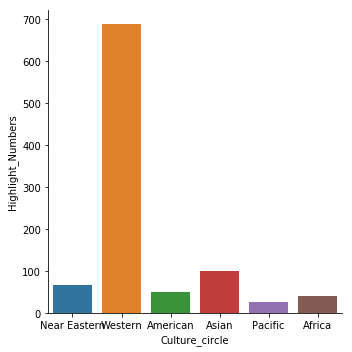

In [72]:
sns.catplot(x='Culture_circle', y='Highlight_Numbers', data=highlights_by_culture, kind='bar')

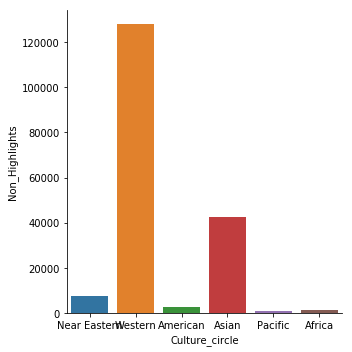

In [74]:
sns.catplot(x='Culture_circle', y='Non_Highlights', data=highlights_by_culture, kind='bar')